## Installing package

In [1]:
# conda install opencv-python

# conda install opencv-contrib-python

'''Uncomment any of the above the code and run to install opencv package'''

'Uncomment any of the above the code and run to install opencv package'

## Importing package

In [2]:
import cv2

## Reading the Image

In [4]:
# To read image from internet or from other directory, just specify the path
path = "mandrill.jpg"
img = cv2.imread(path, 1) # default -> 1 (color image),  0 -> to read as grayscale, -1 for reading the image as unchanged

## Properties the Image


### Shape

In [5]:
h, w, c = img.shape
print("Dimensions of the image are:\n\nHeight:", h, "pixels\nWidth:", w, "pixels\nChannels:", c)

Dimensions of the image are:

Height: 224 pixels
Width: 225 pixels
Channels: 3


### Type

In [6]:
print(type(img))

<class 'numpy.ndarray'>


### Datatype of the image you have just read

In [7]:
print(img.dtype)

uint8


### Image pixel values

In [8]:
print(img)

[[[180 212 223]
  [126 158 169]
  [140 172 183]
  ...
  [135 170 160]
  [174 205 196]
  [233 250 247]]

 [[128 160 171]
  [ 29  61  72]
  [ 33  65  76]
  ...
  [ 66 103  93]
  [ 81 112 103]
  [217 236 233]]

 [[136 166 177]
  [ 50  80  91]
  [ 35  67  78]
  ...
  [ 65 105  94]
  [ 81 115 105]
  [220 241 238]]

 ...

 [[176 176 158]
  [143 143 125]
  [152 150 132]
  ...
  [ 90  94  95]
  [ 77  82  81]
  [232 235 233]]

 [[183 180 165]
  [141 138 123]
  [139 134 119]
  ...
  [ 71  73  73]
  [ 64  66  66]
  [222 227 225]]

 [[255 255 244]
  [240 237 222]
  [255 251 236]
  ...
  [231 233 233]
  [227 230 228]
  [246 251 249]]]


## Viewing the Image

In [9]:
# Display an image in a window
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array

cv2.imshow('Mandrill', img)

# To hold the window on screen, use cv2.waitKey method
# Once it is detected the close input, it will release the control
# To the next line
# First Parameter is for holding screen for specified milliseconds
# It should be positive integer. If 0 pass an parameter, then it will
# hold the screen until user close it.
k = cv2.waitKey(0)
if k == 27 or k == ord('q'):         # wait to press ESC key or q to exit
    cv2.destroyAllWindows()
    # It is for removing/deleting created GUI window from screen and memory

## Converting the image to grayscale and saving it

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting image to grayscale

In [11]:
cv2.imwrite('Mandrill_grey.jpg', gray)  # Saving the image

True

## Extracting the image bit planes and reconstructing it:

In [12]:
# conda install -c conda-forge matplotlib 
# conda install -c anaconda numpy

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def extract_bit_plane(cd):
    #  extracting all bit one by one 
    # from 1st to 8th in variable 
    # from c1 to c8 respectively 
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)

    # combining image again to form equivalent to original grayscale image 
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')

    plt.tight_layout()
    plt.show()
    return cc

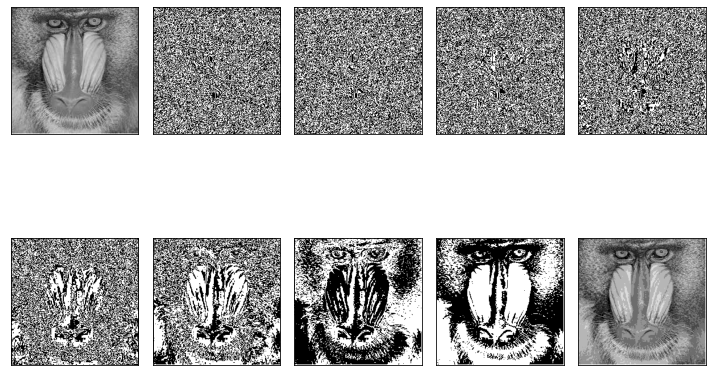

In [15]:
reconstructed_image = extract_bit_plane(gray)

## Constructing your own image:

Generating a synthetic image with four concentric squares of 4 intensity values (40, 80, 160, 220).

In [16]:
con_img = np.zeros([256, 256])

con_img[0:32, :] = 40 # upper row
con_img[:, :32] = 40 #left column
con_img[:, 224:256] = 40 # right column
con_img[224:, :] = 40 # lower row


con_img[32:64, 32:224] = 80 # upper row
con_img[64:224, 32:64] = 80 # left column
con_img[64:224, 192:224] = 80 # right column
con_img[192:224, 32:224] = 80 # lower row


con_img[64:96, 64:192] = 160 # upper row
con_img[96:192, 64:96] = 160 # left column
con_img[96:192, 160:192] = 160 # right column
con_img[160:192, 64:192] = 160 # lower row

con_img[96:160, 96:160] = 220

cv2.imwrite('ConcentricSquareImage.jpg', con_img)  # Saving the image

True